## 요약 정리

dropna로 결측치를 삭제했더니 너무 많은 행이나, 인덱스가 삭제됨.
* 원본   :   (1394216, 17)
* axis=0 : (118688, 17)
* axis=1 : (1394216, 3)
상관관계를 분석해봤더니 상관관계 있는 특징정보가 없다.
결론 : 특정 행만 기준을 잡아 삭제해야 한다.

In [13]:
import pandas as pd
import numpy as np
import os
import random

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
user_df = pd.read_csv('./data/user_spec.csv')
loan_df = pd.read_csv('./data/loan_result.csv')
log_df = pd.read_csv('./data/log_data.csv' )

In [57]:
user_df['age'] = 2022-user_df['birth_year']

In [39]:
user_df.shape

(1394216, 17)

In [46]:
tmp = user_df.dropna(axis=0)

In [47]:
tmp.shape

(118688, 17)

In [48]:
tmp.dropna(axis=0).corr()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
application_id,1.000000,-0.003945,0.000791,-0.002190,-0.001692,0.000555,-0.000641,0.001540,-0.000381,-0.000843,0.000811,-0.003538
user_id,-0.003945,1.000000,-0.009176,0.002725,0.012431,0.011753,0.006039,0.000920,0.005362,0.004934,-0.015219,0.008395
birth_year,0.000791,-0.009176,1.000000,-0.001111,0.005315,-0.114333,-0.001240,-0.044340,-0.241131,-0.064479,-0.098104,-0.258315
gender,-0.002190,0.002725,-0.001111,1.000000,0.005591,0.049655,-0.001935,0.020209,0.022978,0.006067,0.021048,0.077300
credit_score,-0.001692,0.012431,0.005315,0.005591,1.000000,0.053107,-0.001455,0.071833,-0.360053,-0.081419,-0.080825,0.158519
yearly_income,0.000555,0.011753,-0.114333,0.049655,0.053107,1.000000,0.006007,0.036594,-0.000024,0.001144,0.012833,0.127002
company_enter_month,-0.000641,0.006039,-0.001240,-0.001935,-0.001455,0.006007,1.000000,0.001952,-0.001801,-0.006445,-0.007713,-0.001249
desired_amount,0.001540,0.000920,-0.044340,0.020209,0.071833,0.036594,0.001952,1.000000,0.004035,0.009415,-0.022587,0.055543
personal_rehabilitation_yn,-0.000381,0.005362,-0.241131,0.022978,-0.360053,-0.000024,-0.001801,0.004035,1.000000,0.306477,-0.089781,-0.074946
personal_rehabilitation_complete_yn,-0.000843,0.004934,-0.064479,0.006067,-0.081419,0.001144,-0.006445,0.009415,0.306477,1.000000,-0.032692,-0.021919


In [49]:
tmp = user_df.dropna(axis=1)
tmp.shape

(1394216, 3)

In [50]:
user_df.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [65]:
tmp=user_df.drop(['application_id',
                  'user_id',
                  'birth_year',
                  'personal_rehabilitation_complete_yn'], axis=1)
tmp.dropna(axis=0, inplace = True)

In [66]:
tmp.corr()

,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,existing_loan_cnt,existing_loan_amt,age
gender,1.00,0.03,0.05,-0.00,0.02,-0.01,0.01,0.09,-0.05
credit_score,0.03,1.00,0.05,0.00,0.08,-0.19,-0.13,0.16,0.06
yearly_income,0.05,0.05,1.00,0.00,0.15,-0.01,0.02,0.11,0.07
company_enter_month,-0.00,0.00,0.00,1.00,0.00,-0.00,-0.01,0.00,-0.00
desired_amount,0.02,0.08,0.15,0.00,1.00,-0.00,-0.03,0.05,0.02
personal_rehabilitation_yn,-0.01,-0.19,-0.01,-0.00,-0.00,1.00,-0.05,-0.05,0.02
existing_loan_cnt,0.01,-0.13,0.02,-0.01,-0.03,-0.05,1.00,0.27,0.10
existing_loan_amt,0.09,0.16,0.11,0.00,0.05,-0.05,0.27,1.00,0.17
age,-0.05,0.06,0.07,-0.00,0.02,0.02,0.10,0.17,1.00


<AxesSubplot:>

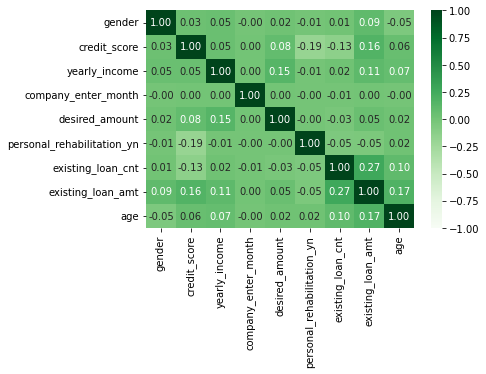

In [67]:
pd.options.display.float_format = '{:.2f}'.format
sb.heatmap(tmp.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           fmt=".2f"
          )